<a href="https://colab.research.google.com/github/Sricharan601/Sentimental_analysis_of_restaurant_reviews/blob/main/sentimental_review_of_restaurent_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import numpy as np
import pandas as pnd

In [4]:
data=pnd.read_csv('/content/drive/MyDrive/Restaurant_Reviews.tsv','\t',quoting=3)

<ipython-input-4-ac5666ffb084>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data=pnd.read_csv('/content/drive/MyDrive/Restaurant_Reviews.tsv','\t',quoting=3)


In [5]:
data.shape


(1000, 2)

In [6]:
data.columns

Index(['Review', 'Liked'], dtype='object')

In [7]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [84]:
data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [85]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
corpus=[]
for i in range(0,1000):
  review=re.sub(pattern='[^a-zA-Z]',repl=' ',string=data['Review'][i])
  review=review.lower()
  review_words=review.split()
  review_words=[word for word in review_words if not word in set(stopwords.words('english'))]
  ps=PorterStemmer()
  review=[ps.stem(word) for word in review_words]
  review=' '.join(review)
  corpus.append(review)

In [87]:
corpus[:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(corpus).toarray()
Y=data.iloc[:,1].values

In [123]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((750, 1500), (250, 1500), (750,), (250,))

Training the model for the dataset


In [124]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train,Y_train)


MultinomialNB()

In [136]:
y_pred=classifier.predict(X_test)
Y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0])

In [137]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1=accuracy_score(Y_test,y_pred)
score2=precision_score(Y_test,y_pred)
score3=recall_score(Y_test,y_pred)
print("-------scores---------")
print("accuracy scores is:{}%".format(round(score1*100,2)))
print("precision score is:{}%".format(round(score2*100,2)))
print("recall score is:{}%".format(round(score3*100,2)))


-------scores---------
accuracy scores is:74.8%
precision score is:76.52%
recall score is:75.94%


In [138]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)

In [139]:
cm

array([[ 86,  31],
       [ 32, 101]])

Text(95.72222222222221, 0.5, 'Actual values')

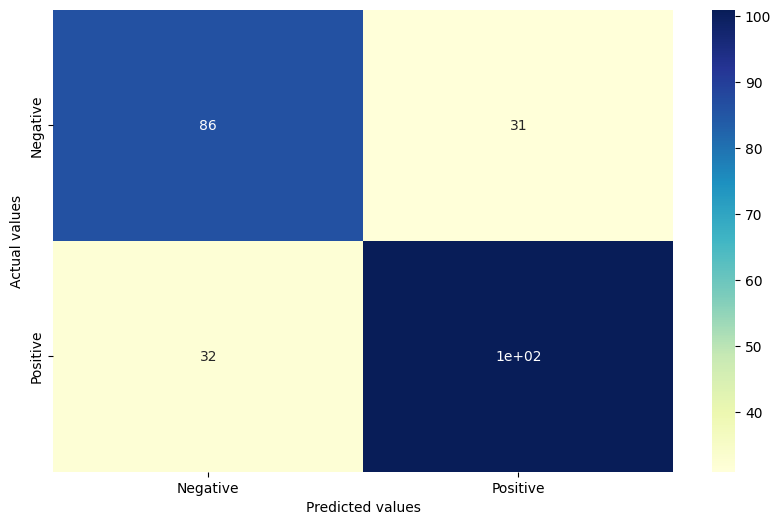

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap="YlGnBu",xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')


In [141]:
best_accuracy=0.0
alpha_val=0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier=MultinomialNB(alpha=i)
  temp_classifier.fit(X_train,Y_train)
  temp_y_pred=temp_classifier.predict(X_test)
  score=accuracy_score(Y_test,temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1),round(score*100,2)))
  if score>best_accuracy:
    best_accuracy=score
    alpha_val=i
print("--------------------------------------------------")
print("the best accuracy is {}% with alpha value as {}".format(round(best_accuracy*100,2),round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 74.8%
Accuracy score for alpha=0.2 is: 75.2%
Accuracy score for alpha=0.3 is: 75.2%
Accuracy score for alpha=0.4 is: 75.2%
Accuracy score for alpha=0.5 is: 73.6%
Accuracy score for alpha=0.6 is: 74.4%
Accuracy score for alpha=0.7 is: 74.4%
Accuracy score for alpha=0.8 is: 74.0%
Accuracy score for alpha=0.9 is: 74.0%
Accuracy score for alpha=1.0 is: 74.4%
--------------------------------------------------
the best accuracy is 75.2% with alpha value as 0.2


In [142]:
classifier=MultinomialNB(alpha=0.1)
classifier.fit(X_train,Y_train)


MultinomialNB(alpha=0.1)

In [146]:
def predict_Sentiment(sample_review):
  sample_review=re.sub(pattern='[^a-zA-Z]',repl=' ',string=sample_review)
  sample_review=sample_review.lower()
  sample_review_words=sample_review.split()
  sample_review_words=[word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps=PorterStemmer()
  final_review=[ps.stem(word) for word in sample_review_words]
  final_review=' '.join(final_review)
  temp=cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [154]:
#predicting values based on the given input
sample_review="the food is really bad"
if predict_Sentiment(sample_review):
  print("This is a Positive review")
else:
  print("This is a Negative Review!")


This is a Negative Review!


In [153]:
#predicting values based on the given input
sample_review="the food was horrible"
if predict_Sentiment(sample_review):
  print("This is a Positive review")
else:
  print("This is a Negative Review!")

This is a Negative Review!


In [155]:
#predicting values based on the given input
sample_review="the food was good"
if predict_Sentiment(sample_review):
  print("This is a Positive review")
else:
  print("This is a Negative Review!")

This is a Positive review


In [156]:
#predicting the values by taking the input from the user
#such practices can be employed in applications based on the user interface
sample_review=input("please enter the review:")
if predict_Sentiment(sample_review):
  print("This is a Positive review")
else:
  print("This is a Negative Review!")

please enter the review:food was good
This is a Positive review


In [157]:
#predicting values by taking the input from the user
sample_review=input("Please enter your review:")
if predict_Sentiment(sample_review):
  print("This is a Positive review")
else:
  print("This is a Negative Review!")

Please enter your review:excellent place
This is a Positive review
